# Review : Exploratory Data Analysis con Pandas y Preprocessing
#### UD1. Introducción al Machine Learning
#### MP. Sistemas de Aprendizaxe Automático
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este cuarto notebook repasaremos los conceptos trabajados anteriormente


### *Ejercicio 0: Importación*

Carga en un dataframe el fichero adults.csv y muestra las primeras 10 filas.

In [28]:
import pandas as pd
import numpy as np

adults = pd.read_csv('data/adult.csv', skipinitialspace=True)

adults.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
5,49.0,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
6,52.0,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
7,31.0,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
8,42.0,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50K
9,37.0,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80.0,United-States,>50K


### *Ejercicio 1: Datos generales*

1. ¿Cuántas filas y columnas tiene el dataset?

In [2]:
shape = adults.shape
print(f'{shape[0]} filas')
print(f'{shape[1]} columnas')

32560 filas
15 columnas


2. Muestra información detallada de cada columna. Para cada tipo de datos, ¿Cuántas columnas tienes de dicho tipo?

In [3]:
adults.info()
# 3 de tipo float
# 3 de tipo int
# 9 de tipo object (string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32559 non-null  float64
 1   workclass       32557 non-null  object 
 2   fnlwgt          32560 non-null  int64  
 3   education       32560 non-null  object 
 4   education-num   32554 non-null  float64
 5   marital-status  32560 non-null  object 
 6   occupation      32560 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32558 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32552 non-null  float64
 13  native-country  32560 non-null  object 
 14  gains           32560 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


3. Muestra información estadística de cada columna numérica y responde a las siguientes preguntas.¿Cuantos años tiene el usuario más mayor y el más joven? ¿Cuál es la mayor ganancia para un usuario? ¿En qué cuartil se superan las 40h semanales de trabajo?

In [4]:
df_statistic = adults.describe()

print(f'El usuario más mayor tiene {df_statistic["age"]["max"]} años')
print(f'El usuario más joven tiene {df_statistic["age"]["min"]} años')
print(f'El usuario que más ha ganado ganó {df_statistic["capital-gain"]["max"]}')
print(f'En el cuartil 75 se superan las 40h semanales: {df_statistic["hours-per-week"]["75%"]}')

df_statistic

El usuario más mayor tiene 90.0 años
El usuario más joven tiene 17.0 años
El usuario que más ha ganado ganó 99999.0
En el cuartil 75 se superan las 40h semanales: 45.0


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.256000e+04,32554.000000,32560.000000,32560.000000,32552.000000
mean,38.582266,1.897818e+05,10.080482,1077.615172,87.306511,40.438345
std,13.640374,1.055498e+05,2.572830,7385.402999,402.966116,12.346980
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


4. ¿Existen nulos en alguna de las columnas?

In [5]:
nulls = adults.isnull().sum()
print(f'En las columnas age({nulls["age"]}), education-num({nulls["education-num"]}) y hours-per-week({nulls["hours-per-week"]})')

En las columnas age(1), education-num(6) y hours-per-week(8)


### *Ejercicio 3: Índices*

1. ¿Qué valores diferentes tiene la columna relationship? ¿En qué proporción?

In [6]:
print(adults['relationship'].unique().tolist())

print(adults['relationship'].value_counts().transform(lambda x: x / adults.shape[0]))

['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
Husband           0.405190
Not-in-family     0.255037
Own-child         0.155651
Unmarried         0.105835
Wife              0.048157
Other-relative    0.030129
Name: relationship, dtype: float64


2. ¿Y la columna native-country?

In [7]:
print(adults['native-country'].unique().tolist())

print(adults['native-country'].value_counts().transform(lambda x: x / adults.shape[0]))

['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                       

3. Crea un nuevo dataframe llamado adults_new_index con un índice para las columna relationship y native-country.

In [8]:
adults_new_index = adults.set_index(['relationship', 'native-country'])

adults_new_index

age         workclass  fnlwgt   education  \
relationship  native-country                                               
Husband       United-States   50.0  Self-emp-not-inc   83311   Bachelors   
Not-in-family United-States   38.0           Private  215646     HS-grad   
Husband       United-States   53.0           Private  234721        11th   
Wife          Cuba            28.0           Private  338409   Bachelors   
              United-States   37.0           Private  284582     Masters   
...                            ...               ...     ...         ...   
              United-States   27.0           Private  257302  Assoc-acdm   
Husband       United-States   40.0           Private  154374     HS-grad   
Unmarried     United-States   58.0           Private  151910     HS-grad   
Own-child     United-States   22.0           Private  201490     HS-grad   
Wife          United-States   52.0      Self-emp-inc  287927     HS-grad   

                              education-num      marital-status  \
relationship  native-country                                      
Husband       United-States            13.0  Married-civ-spouse   
Not-in-family United-States             9.0            Divorced   
Husband       United-States             7.0  Married-civ-spouse   
Wife          Cuba                     13.0  Married-civ-spouse   
              United-States            14.0  Married-civ-spouse   
...                                     ...                 ...   
              United-States            12.0  Married-civ-spouse   
Husband       United-States             9.0  Married-civ-spouse   
Unmarried     United-States             9.0             Widowed   
Own-child     United-States             9.0       Never-married   
Wife          United-States             9.0  Married-civ-spouse   

                                     occupation   race     sex  capital-gain  \
relationship  native-country                                                   
Husband       United-States     Exec-managerial  White    Male             0   
Not-in-family United-States   Handlers-cleaners  White    Male             0   
Husband       United-States   Handlers-cleaners  Black    Male             0   
Wife          Cuba               Prof-specialty  Black  Female             0   
              United-States     Exec-managerial  White  Female             0   
...                                         ...    ...     ...           ...   
              United-States        Tech-support  White  Female             0   
Husband       United-States   Machine-op-inspct  White    Male             0   
Unmarried     United-States        Adm-clerical  White  Female             0   
Own-child     United-States        Adm-clerical  White    Male             0   
Wife          United-States     Exec-managerial  White  Female         15024   

                              capital-loss  hours-per-week  gains  
relationship  native-country                                       
Husband       United-States              0            13.0  <=50K  
Not-in-family United-States              0            40.0  <=50K  
Husband       United-States              0            40.0  <=50K  
Wife          Cuba                       0            40.0  <=50K  
              United-States              0            40.0  <=50K  
...                                    ...             ...    ...  
              United-States              0            38.0  <=50K  
Husband       United-States              0            40.0   >50K  
Unmarried     United-States              0            40.0  <=50K  
Own-child     United-States              0            20.0  <=50K  
Wife          United-States              0            40.0   >50K  

[32560 rows x 13 columns]

### *Ejercicio 4: Selección de datos específicos por columna/fila*

1. Muestra los datos exclusivamente de las columnas edad, sexo y ganancias.
2. Sobre el conjunto anterior muestra las últimas 10 filas.

In [9]:
print(adults[['age', 'sex', 'gains']])
print(adults[['age', 'sex', 'gains']].tail(10))

        age     sex  gains
0      50.0    Male  <=50K
1      38.0    Male  <=50K
2      53.0    Male  <=50K
3      28.0  Female  <=50K
4      37.0  Female  <=50K
...     ...     ...    ...
32555  27.0  Female  <=50K
32556  40.0    Male   >50K
32557  58.0  Female  <=50K
32558  22.0    Male  <=50K
32559  52.0  Female   >50K

[32560 rows x 3 columns]
        age     sex  gains
32550  32.0    Male  <=50K
32551  43.0    Male  <=50K
32552  32.0    Male  <=50K
32553  53.0    Male   >50K
32554  22.0    Male  <=50K
32555  27.0  Female  <=50K
32556  40.0    Male   >50K
32557  58.0  Female  <=50K
32558  22.0    Male  <=50K
32559  52.0  Female   >50K


3. Muestra los datos de las columnas primera, segunda, tercera y quinta para las 100 primeras filas. Ordena el resultado de forma descendente por edad.

In [10]:
adults.iloc[:, [0,1,2,4]].head(100).sort_values('age', ascending=False)

,age,workclass,fnlwgt,education-num
73,79.0,Private,124744,10.0
99,76.0,Private,124191,14.0
76,67.0,?,212759,6.0
82,59.0,Private,159937,9.0
23,59.0,Private,109015,9.0
...,...,...,...,...
69,19.0,Private,101509,10.0
25,19.0,Private,168294,9.0
79,18.0,Private,446839,9.0
77,18.0,Private,309634,7.0


4. Muestra las 4 últimas columnas para todas las filas.

In [11]:
adults.iloc[:, -4:]

,capital-loss,hours-per-week,native-country,gains
0,0,13.0,United-States,<=50K
1,0,40.0,United-States,<=50K
2,0,40.0,United-States,<=50K
3,0,40.0,Cuba,<=50K
4,0,40.0,United-States,<=50K
...,...,...,...,...
32555,0,38.0,United-States,<=50K
32556,0,40.0,United-States,>50K
32557,0,40.0,United-States,<=50K
32558,0,20.0,United-States,<=50K


5. Utilizando el dataframe que has creado en el ejercicio 3.3, recupera el número de usuarios/as de nacionalidad cubana y solteros/as.  ¿Cómo lo harías sobre el dataframe adults que no tiene dicho índice?

In [12]:
print(adults_new_index.loc['Unmarried', 'Cuba'].shape[0])

print(adults[(adults['relationship'] == 'Unmarried') & (adults['native-country'] == 'Cuba')].shape[0])

13
13


/tmp/ipykernel_7804/4037167494.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(adults_new_index.loc['Unmarried', 'Cuba'].shape[0])


6. EXTRA1: Busca todas aquellas mujeres solteras de nacionalidad cubana

In [13]:
adults_new_index[adults_new_index['sex']=='Female'].loc['Unmarried', 'Cuba']

/tmp/ipykernel_7804/1143091267.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  adults_new_index[adults_new_index['sex']=='Female'].loc['Unmarried', 'Cuba']


age workclass  fnlwgt     education  \
relationship native-country                                         
Unmarried    Cuba            31.0   Private  243605     Bachelors   
             Cuba            52.0   Private  366232           9th   
             Cuba            38.0   Private  229180     Bachelors   
             Cuba            72.0   Private  195184       HS-grad   
             Cuba            46.0   Private  213408  Some-college   
             Cuba            55.0   Private  223613       1st-4th   
             Cuba            36.0   Private  229180  Some-college   
             Cuba            47.0   Private  218435       HS-grad   
             Cuba            40.0         ?  224361           9th   
             Cuba            41.0   Private  183105       HS-grad   
             Cuba            52.0   Private  318975       HS-grad   
             Cuba            66.0   Private  236784     Bachelors   
             Cuba            45.0   Private  297676    Assoc-acdm   

                             education-num         marital-status  \
relationship native-country                                         
Unmarried    Cuba                     13.0                Widowed   
             Cuba                      5.0               Divorced   
             Cuba                     13.0          Never-married   
             Cuba                      9.0                Widowed   
             Cuba                     10.0               Divorced   
             Cuba                      2.0               Divorced   
             Cuba                     10.0               Divorced   
             Cuba                      9.0  Married-spouse-absent   
             Cuba                      5.0               Divorced   
             Cuba                      9.0              Separated   
             Cuba                      9.0               Divorced   
             Cuba                     13.0               Divorced   
             Cuba                     12.0                Widowed   

                                    occupation   race     sex  capital-gain  \
relationship native-country                                                   
Unmarried    Cuba                        Sales  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba              Exec-managerial  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba                            ?  White  Female             0   
             Cuba            Machine-op-inspct  White  Female             0   
             Cuba                 Adm-clerical  White  Female             0   
             Cuba               Prof-specialty  White  Female             0   
             Cuba                        Sales  White  Female             0   

                             capital-loss  hours-per-week  gains  
relationship native-country                                       
Unmarried    Cuba                    1380            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            12.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            30.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            20.0  <=50K  
             Cuba                       0             5.0  <=50K  
             Cuba                  

7. EXTRA2: Busca todas aquellas mujeres solteras de nacionalidad cubana que trabajen más de 40 horas a la semana

In [14]:
adults_new_index[(adults_new_index['sex']=='Female') & (adults_new_index['hours-per-week'] > 40)].loc['Unmarried', 'Cuba']

/tmp/ipykernel_7804/335353529.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  adults_new_index[(adults_new_index['sex']=='Female') & (adults_new_index['hours-per-week'] > 40)].loc['Unmarried', 'Cuba']


,,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,gains
relationship,native-country,,,,,,,,,,,,,
Unmarried,Cuba,41.0,Private,183105,HS-grad,9.0,Separated,Machine-op-inspct,White,Female,0,0,44.0,<=50K


8. EXTRA3: Crea un nuevo dataframe que contenga exclusivamente a aquellos usuarios con nacionalidad portuguesa, francesa o nord-americana. Pista: utiliza la función isin. Borra las columnas occupation, capital-gain y capital-loss. Crea una nueva columna 'age-range' que tome los valores young para usuarios menores de 30 años, old para mayores de 60 y intermediate en cualquier otro caso.

In [15]:
new_df = adults[adults['native-country'].isin(['Cuba', 'Portugal', 'France', 'Canada', 'United-States'])].drop(['capital-gain', 'capital-loss'], axis=1)

def age_transform(age):
    if age < 30:
        return 'young'
    elif age > 60:
        return 'old'
    else:
        return 'intermediate'

new_df['age-range'] = new_df['age'].transform(age_transform)

new_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,gains,age-range
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,intermediate
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,intermediate
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,intermediate
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,young
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,United-States,<=50K,young
32556,40.0,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,United-States,>50K,intermediate
32557,58.0,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,40.0,United-States,<=50K,intermediate
32558,22.0,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,20.0,United-States,<=50K,young


9. EXTRA4: Busca información sobre las funciones isnull, dropna y fillna. ¿Para qué se utilizan? Por un ejemplo interesante para cada una de ellas dónde se demuestre su utilidad.

In [16]:
# isnull sirve para detectar que valores son nulos en un DataFrame o Serie
# dropna sirve para eliminar las filas que contengan valores nulos en un DataFrame o Serie
# fillna sirve para sustituir los valores los valores nulos por un valor especificado o siguiendo un determinado metodo (los valores nulos se sustituyen por el ultimo valor valido o el valor nulo se sustituye por el siguiente valor valido)

df = pd.DataFrame([[np.nan, 2, np.nan, 0],
    [3, 4, np.nan, 1],
    [np.nan, np.nan, np.nan, np.nan],
    [np.nan, 3, np.nan, 4]],
    columns=['A', 'B', 'C', 'D']
)

print(df, end='\n\n')
print(df.fillna('NULO'), end='\n\n')
print(df.fillna(method='ffill'), end='\n\n')
print(df.fillna(method='bfill'), end='\n\n')

     A    B   C    D
0  NaN  2.0 NaN  0.0
1  3.0  4.0 NaN  1.0
2  NaN  NaN NaN  NaN
3  NaN  3.0 NaN  4.0

      A     B     C     D
0  NULO   2.0  NULO   0.0
1   3.0   4.0  NULO   1.0
2  NULO  NULO  NULO  NULO
3  NULO   3.0  NULO   4.0

     A    B   C    D
0  NaN  2.0 NaN  0.0
1  3.0  4.0 NaN  1.0
2  3.0  4.0 NaN  1.0
3  3.0  3.0 NaN  4.0

     A    B   C    D
0  3.0  2.0 NaN  0.0
1  3.0  4.0 NaN  1.0
2  NaN  3.0 NaN  4.0
3  NaN  3.0 NaN  4.0



### *Ejercicio 5: Agrupaciones*

1. Tomando los datos presentes en este dataset, ¿Cuál es la nacionalidad que tiene una mayor media de edad? ¿Y menor media?


In [17]:
print(adults.groupby('native-country', as_index=False).mean().max()['native-country'])
print(adults.groupby('native-country', as_index=False).mean().min()['native-country'])

Yugoslavia
?


### *Ejercicio 6: Gráficos*

1. Para cada columna (o feature) numérica, crea un gráfico de barras que muestre su distribución de valores.


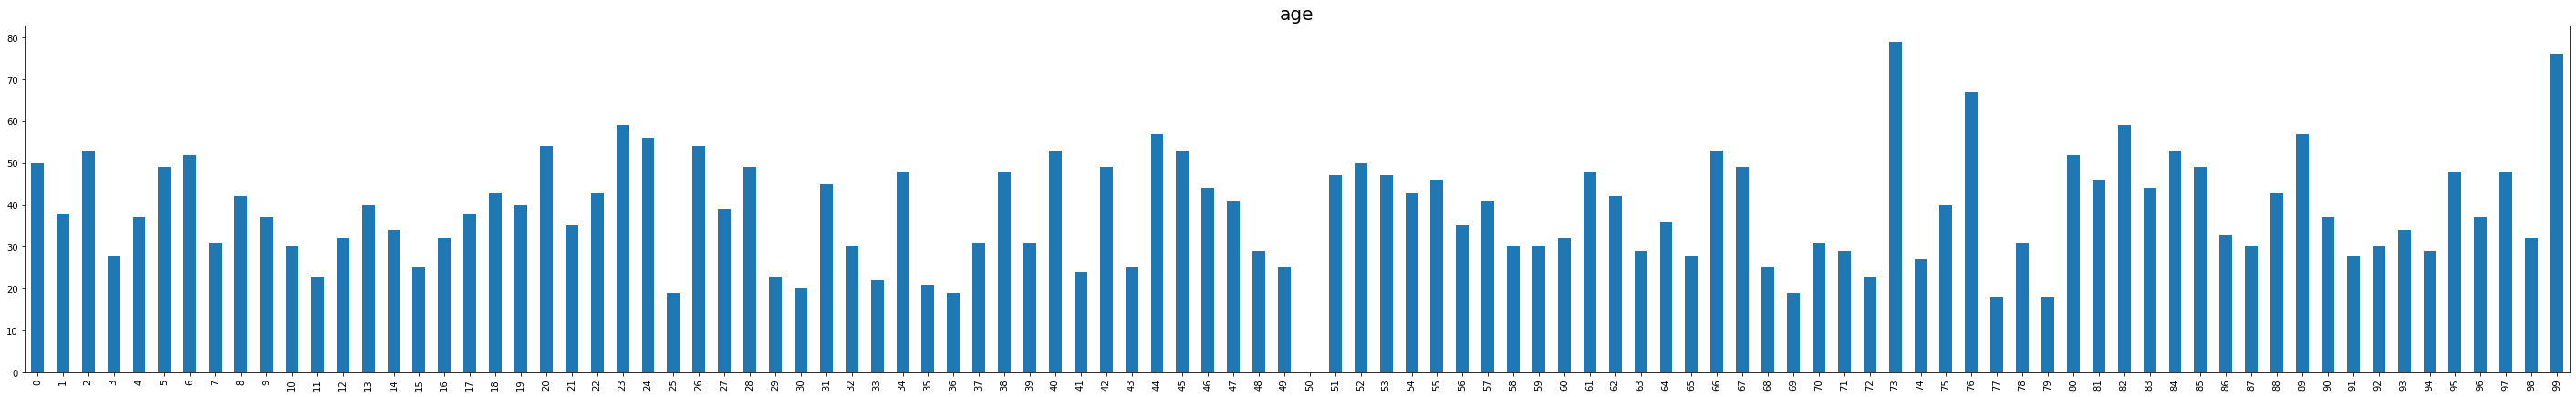

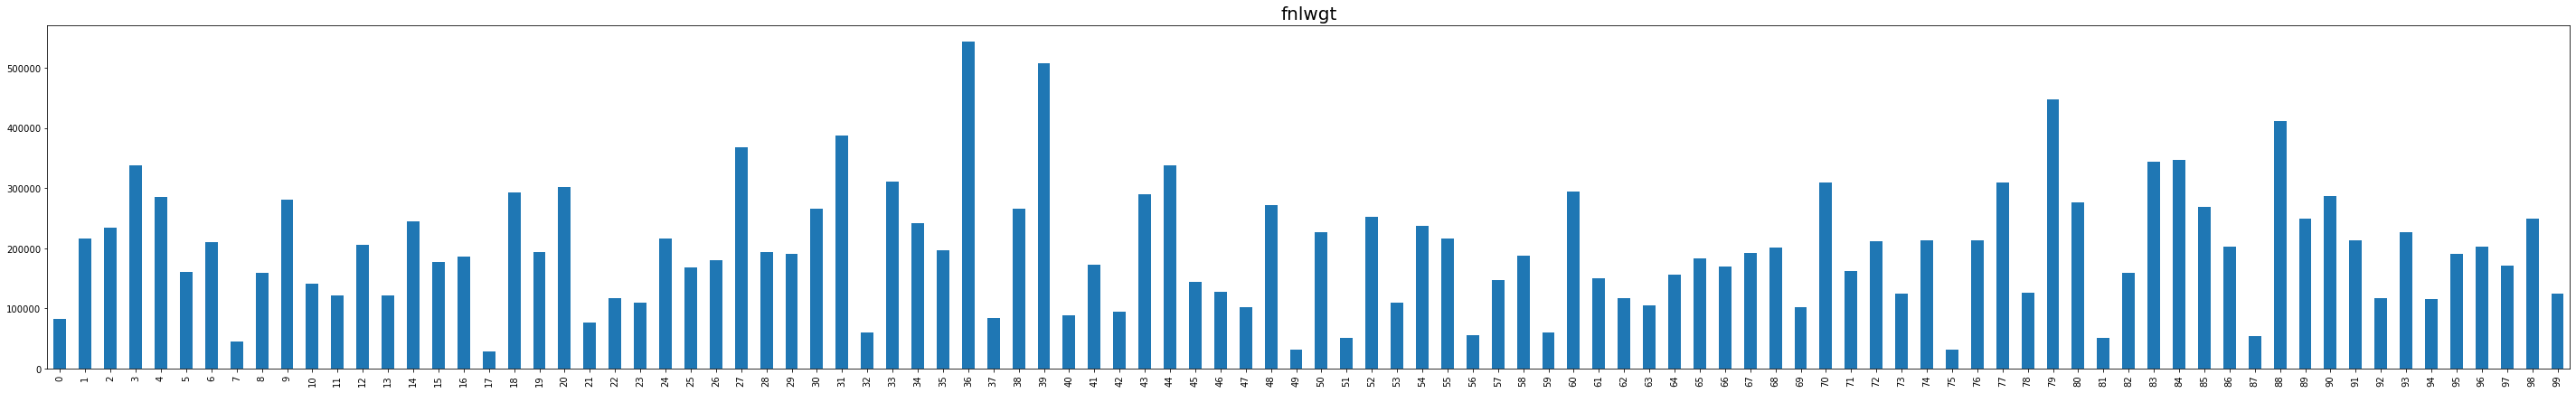

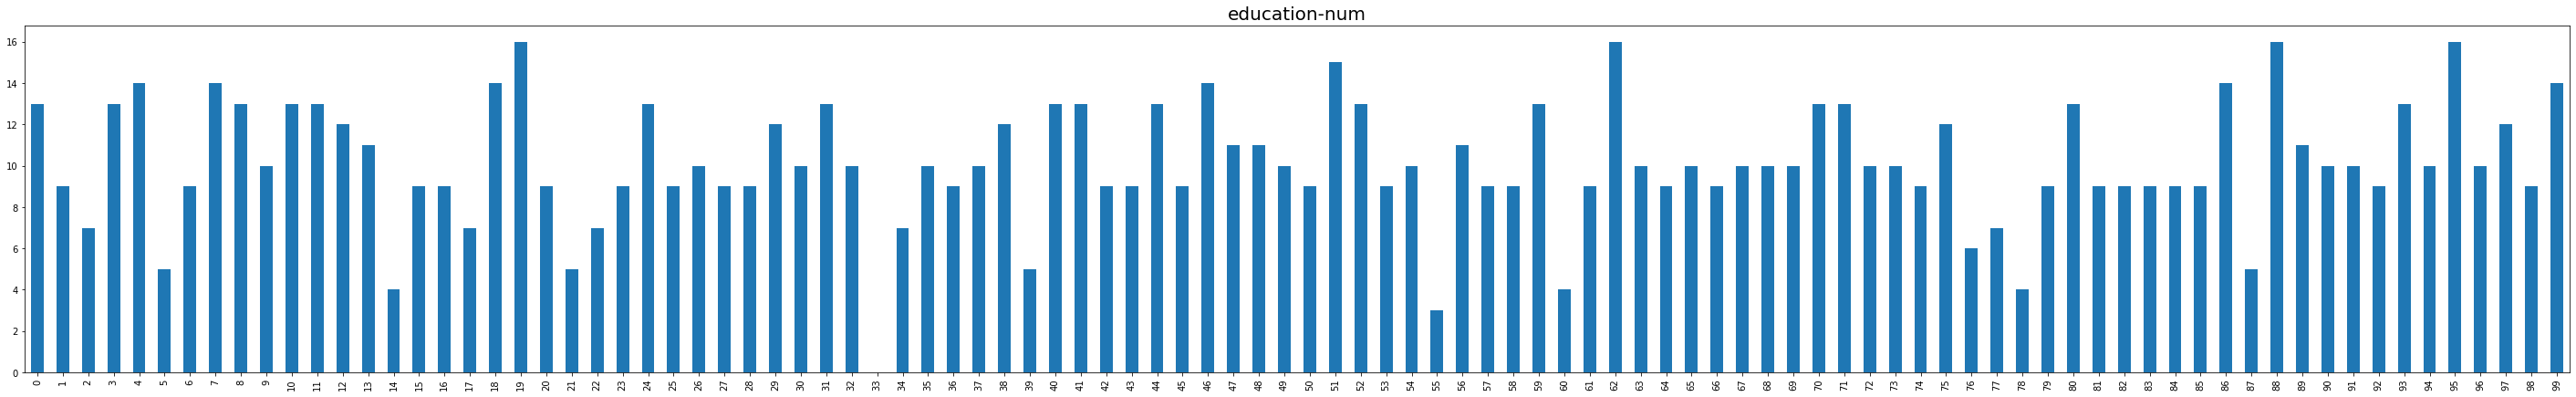

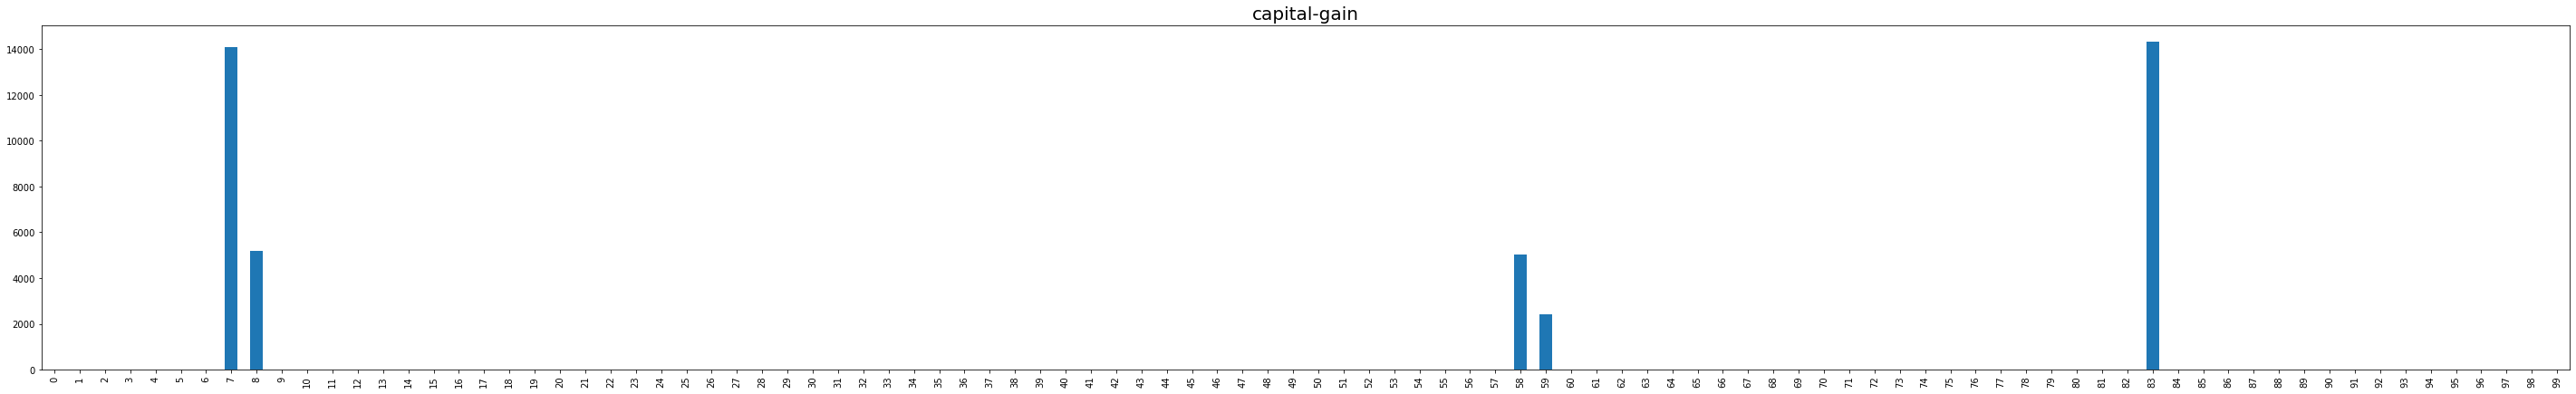

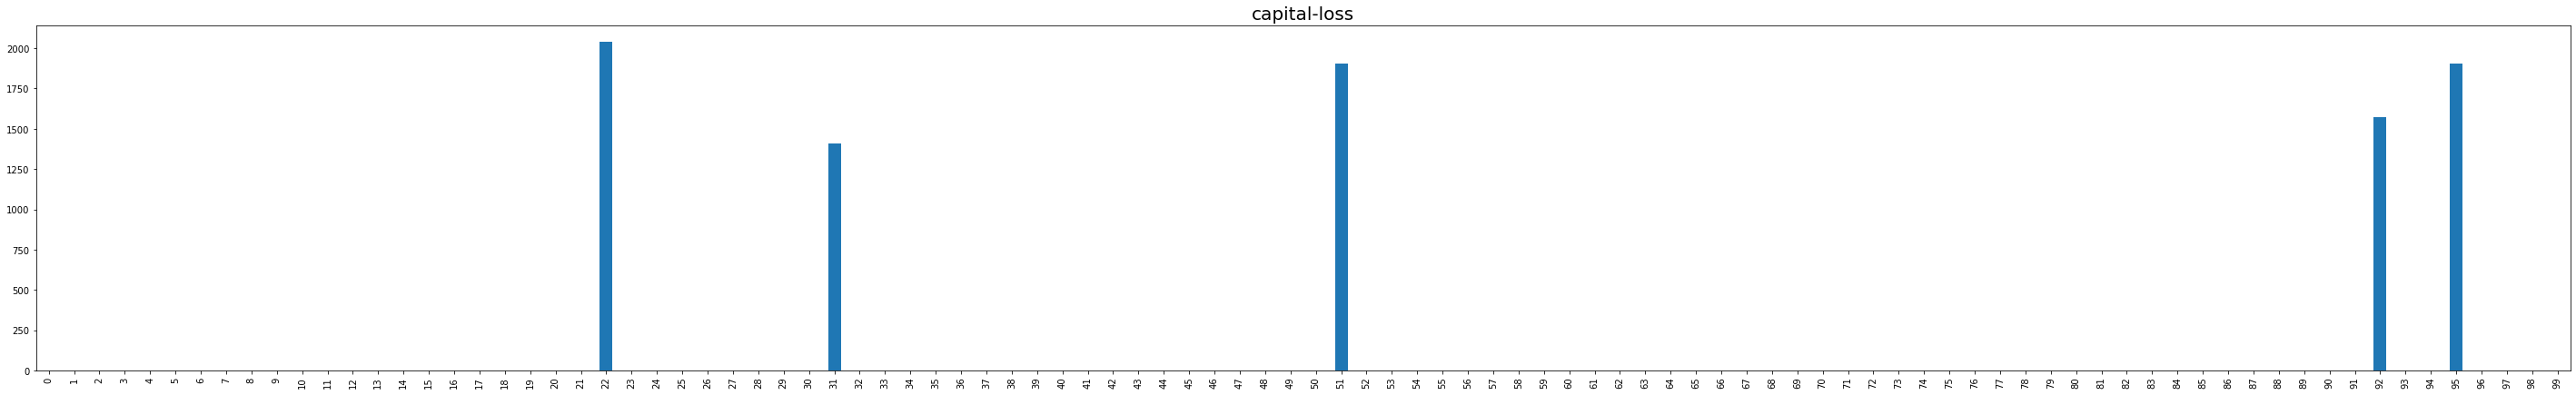

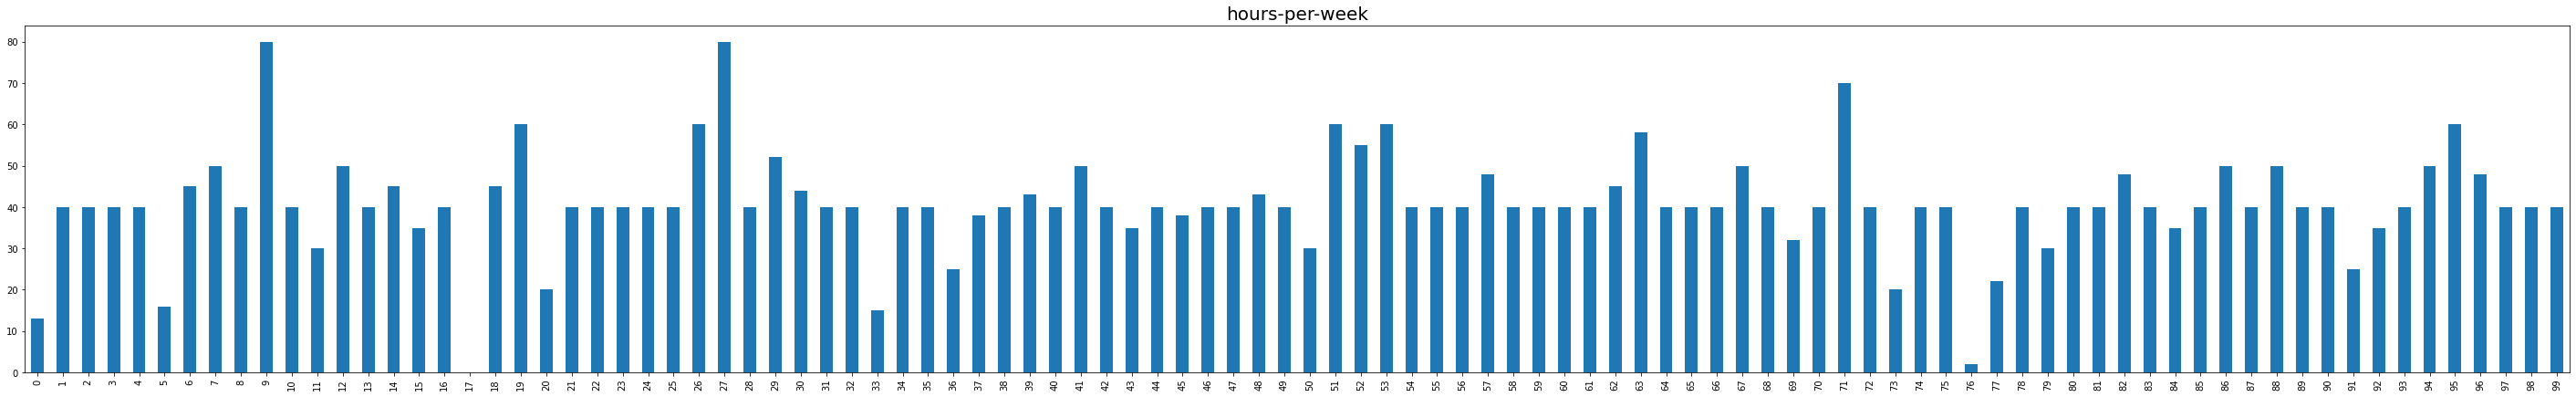

In [18]:
import matplotlib.pyplot as plt

for column in adults.select_dtypes(include=np.number).columns:
    adults[column].head(100).plot.bar(figsize=(50, 7)) # Se añade el head(100) para agilizar el proceso ya que con todos los registros tarda demasiado
    plt.title(column, fontsize=20)
    plt.show()

2. EXTRA: A continuación tienes un código que crea gráficos que muestran la distribución de las ganancias respecto al resto de columnas. Extrae conclusiones de los resultados y propón realizar estos gráficos para otra columna que consideres de interés.

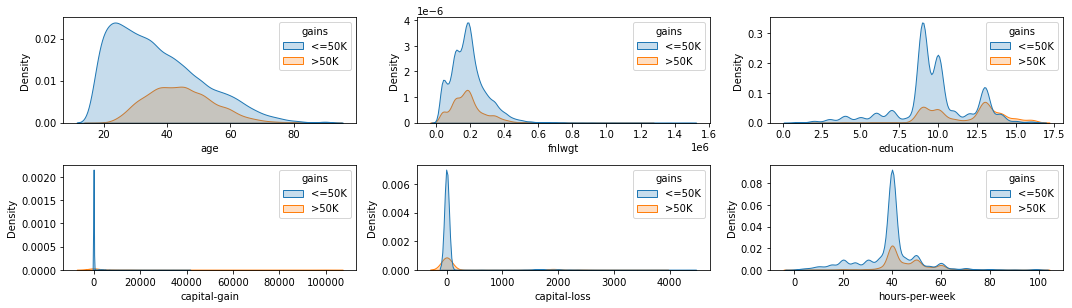

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_numerics = adults.select_dtypes(include = np.number)

figure=plt.figure(figsize = (15, 6))

for i, column in enumerate(df_numerics.columns, 1):
    axes = figure.add_subplot(3,3,i)
    sns.kdeplot(x = df_numerics[column], hue = adults['gains'], fill = True, ax = axes)
    figure.tight_layout()

# Por ejemplo podemos ver que las personas que tienen ganancias superiores a 50k no trabajan menos de 40 horas
# Las personas que mas ganan han estudiado mas de 7.5 años

# Seria interesante realizarlo para el pais de origen

### *Ejercicio 7: Valores missing*

1. Gestiona los valores nulos con la técnica del rellenado. ¿Qué valores piensas que deberían de tener los nulos presentes en el dataset?

In [20]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

num_colunmns = adults.select_dtypes(np.number).columns

adults[num_colunmns] = imp.fit_transform(adults[num_colunmns])

2. Borra las columnas fnlwgt, education, capital_gain y capital_loss.

In [21]:
adults.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,gains
0,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
1,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
2,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
3,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K
4,37.0,Private,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,United-States,<=50K
32556,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,United-States,>50K
32557,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,40.0,United-States,<=50K
32558,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,20.0,United-States,<=50K


### *Ejercicio 8: Datos categóricos*

1. Transforma todas las columnas categóricas a numéricas con un LabelEncoder.

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = adults.select_dtypes(include=object).columns.tolist()

for column in categorical_columns:
    adults[column] = LabelEncoder().fit_transform(adults[column])

### *Ejercicio 9: Escalado de los datos*


1. EXTRA1: Divide el dataset en 4 grupos (training y testing).

In [23]:
from sklearn.model_selection import train_test_split

X, y = adults.iloc[:, :-1].values, adults.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


2. EXTRA2: Escala las columnas categóricas con un StandardScaler.

In [24]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
for column in categorical_columns:
    adults[column] = stdsc.fit_transform(adults[[column]])

adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,1.462731,83311.0,-0.335443,13.0,-0.406183,-0.608434,-0.900177,0.393574,0.703087,0.0,0.0,13.0,0.291573,-0.563210
1,38.0,0.089754,215646.0,0.181319,9.0,-1.734026,-0.135480,-0.277810,0.393574,0.703087,0.0,0.0,40.0,0.291573,-0.563210
2,53.0,0.089754,234721.0,-2.402489,7.0,-0.406183,-0.135480,-0.900177,-1.962516,0.703087,0.0,0.0,40.0,0.291573,-0.563210
3,28.0,0.089754,338409.0,-0.335443,13.0,-0.406183,0.810427,2.211658,-1.962516,-1.422298,0.0,0.0,40.0,-4.054157,-0.563210
4,37.0,0.089754,284582.0,0.439700,14.0,-0.406183,-0.608434,2.211658,0.393574,-1.422298,0.0,0.0,40.0,0.291573,-0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,0.089754,257302.0,-0.852204,12.0,-0.406183,1.519858,2.211658,0.393574,-1.422298,0.0,0.0,38.0,0.291573,-0.563210
32556,40.0,0.089754,154374.0,0.181319,9.0,-0.406183,0.100997,-0.900177,0.393574,0.703087,0.0,0.0,40.0,0.291573,1.775537
32557,58.0,0.089754,151910.0,0.181319,9.0,2.249503,-1.317864,1.589291,0.393574,-1.422298,0.0,0.0,40.0,0.291573,-0.563210
32558,22.0,0.089754,201490.0,0.181319,9.0,0.921660,-1.317864,0.966924,0.393574,0.703087,0.0,0.0,20.0,0.291573,-0.563210


# Webgrafía


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.